## What is Clustering
The goal of clustering is to determine the internal grouping in a set of unlabeled data. But how to decide what constitutes a good clustering? It can be shown that there is no absolute “best” criterion which would be independent of the final aim of the clustering. Consequently, it is the user who should supply this criterion, in such a way that the result of the clustering will suit their needs.
Source: https://towardsdatascience.com/unsupervised-learning-and-data-clustering-eeecb78b422a

In [33]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans

In [34]:
df= pd.read_csv('AB_NYC_2019_raw.csv')

In [35]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [36]:
#here im deleting columns that might not be helpful
del df['id']
del df['host_id']
del df['name']
del df['host_name']
del df['last_review']

In [37]:
# i want to check if it worked
df.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


In [38]:
# I want to see if there will be missing information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 11 columns):
neighbourhood_group               48895 non-null object
neighbourhood                     48895 non-null object
latitude                          48895 non-null float64
longitude                         48895 non-null float64
room_type                         48895 non-null object
price                             48895 non-null int64
minimum_nights                    48895 non-null int64
number_of_reviews                 48895 non-null int64
reviews_per_month                 38843 non-null float64
calculated_host_listings_count    48895 non-null int64
availability_365                  48895 non-null int64
dtypes: float64(3), int64(5), object(3)
memory usage: 4.1+ MB


In [39]:
# it looks like there's no blanks aside from df['reviews_per_month']
# so then i'll fill it the blanks with the average number of views for df['reviews_per_month']

In [40]:
df.columns

Index(['neighbourhood_group', 'neighbourhood', 'latitude', 'longitude',
       'room_type', 'price', 'minimum_nights', 'number_of_reviews',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [41]:
df['reviews_per_month'].fillna(df['reviews_per_month'].mean(), inplace = True)

In [43]:
# i want to check if fillna worked
df.head()
df['neighbourhood_group'].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 11 columns):
neighbourhood_group               48895 non-null object
neighbourhood                     48895 non-null object
latitude                          48895 non-null float64
longitude                         48895 non-null float64
room_type                         48895 non-null object
price                             48895 non-null int64
minimum_nights                    48895 non-null int64
number_of_reviews                 48895 non-null int64
reviews_per_month                 48895 non-null float64
calculated_host_listings_count    48895 non-null int64
availability_365                  48895 non-null int64
dtypes: float64(3), int64(5), object(3)
memory usage: 4.1+ MB


In [12]:
# then I'm going to make dummies

# select columns based on data type
object_type_columns = list(df.select_dtypes(include = 'object').columns) 
#print (object_type_columns)

#change object type to numerical type for the analysis
for column_name in object_type_columns:
    df[column_name] = pd.get_dummies(df[column_name], drop_first=True)

df.head() # to check

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,1,0,40.64749,-73.97237,1,149,1,9,0.210000,6,365
1,0,0,40.75362,-73.98377,0,225,1,45,0.380000,2,355
2,0,0,40.80902,-73.94190,1,150,3,0,1.373221,1,365
3,1,0,40.68514,-73.95976,0,89,1,270,4.640000,1,194
4,0,0,40.79851,-73.94399,0,80,10,9,0.100000,1,0


In [13]:
df.columns

Index(['neighbourhood_group', 'neighbourhood', 'latitude', 'longitude',
       'room_type', 'price', 'minimum_nights', 'number_of_reviews',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [27]:
from sklearn.preprocessing import StandardScaler

# Separating out the features
x = df[['neighbourhood', 'latitude', 'longitude',
       'room_type', 'price', 'minimum_nights', 'number_of_reviews',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365']]

# Separating out the target
y = df['neighbourhood_group']

# Standardizing the features
x = StandardScaler().fit_transform(x)

# Dimensionality Reduction

## PCA

In [28]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_Components = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
print(principalDf)

       principal component 1  principal component 2
0                  -1.407369              -0.674063
1                   1.288277               0.437995
2                   1.213587               1.077383
3                  -2.328560               3.998491
4                   1.370851              -0.480506
5                   0.840620               0.401352
6                  -1.285427              -0.838509
7                  -1.253955               6.591016
8                   0.362476               1.431933
9                   0.133592               1.697807
10                  1.293871               0.113398
11                 -0.264419               2.290513
12                 -2.012159               1.663407
13                  0.644632               2.114940
14                  1.710276              -1.299125
15                 -1.354379               0.873152
16                 -1.378732               2.121247
17                 -0.755386               3.247032
18          

In [29]:
finalDf = pd.concat([principalDf, df[['neighbourhood_group']]], axis = 1)
print(finalDf)

       principal component 1  principal component 2  neighbourhood_group
0                  -1.407369              -0.674063                    1
1                   1.288277               0.437995                    0
2                   1.213587               1.077383                    0
3                  -2.328560               3.998491                    1
4                   1.370851              -0.480506                    0
5                   0.840620               0.401352                    0
6                  -1.285427              -0.838509                    1
7                  -1.253955               6.591016                    0
8                   0.362476               1.431933                    0
9                   0.133592               1.697807                    0
10                  1.293871               0.113398                    0
11                 -0.264419               2.290513                    0
12                 -2.012159               1.663407

//anaconda3/lib/python3.7/site-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


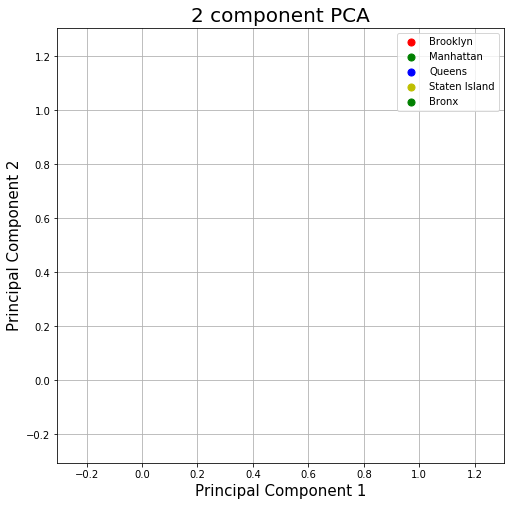

In [44]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx']
colors = ['r', 'g', 'b', 'y', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['neighbourhood_group'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

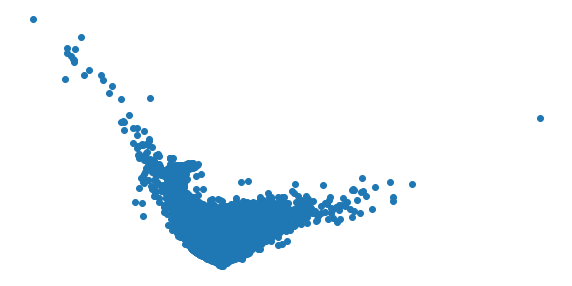

In [31]:
plt.figure(figsize=(10,5))
plt.scatter(pca_Components[:, 0], pca_Components[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()